In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

In [2]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("train_images shape", train_images.shape)
print("train_labels shape", train_labels.shape)

train_images shape (60000, 28, 28)
train_labels shape (60000,)


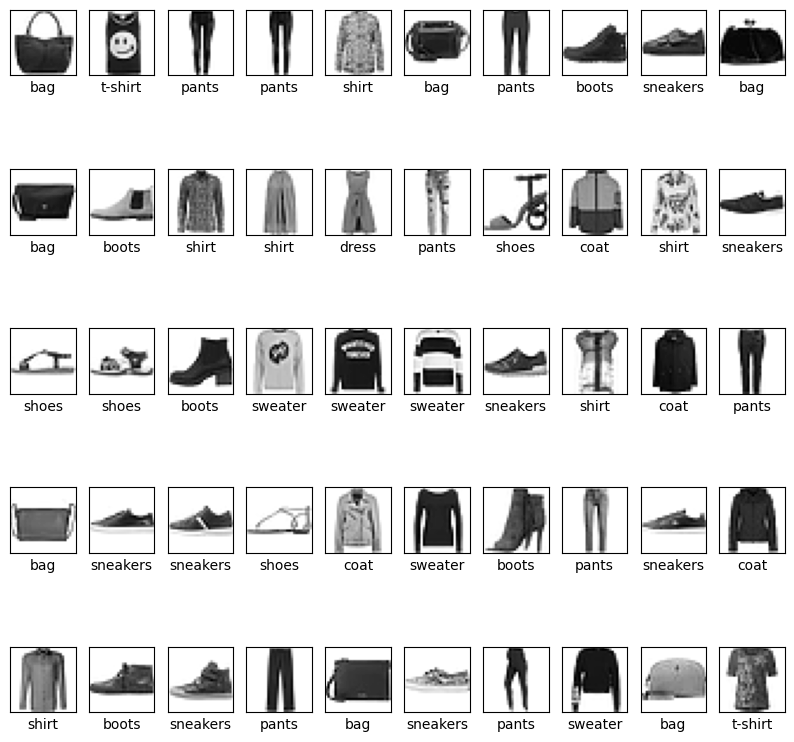

In [4]:
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']

plt.figure(figsize=(10, 10))
for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])

plt.show()

In [5]:
# Масштабування значень пікселів до діапазону від 0 до 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print("Number of train data - " + str(len(train_images)))
print("Number of test data - " + str(len(test_images)))

Number of train data - 60000
Number of test data - 10000


In [ ]:
# Змінюємо розмір зображень та додаємо новий канал (ч/б зображення)
# train_images = train_images.reshape((60000, 28, 28, 1))
# test_images = test_images.reshape((10000, 28, 28, 1))


# Преобразування цільових міток до формату one-hot encoding
# train_labels = tf.keras.utils.to_categorical(train_labels)
# test_labels = tf.keras.utils.to_categorical(test_labels)

# print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

In [6]:
# Преобразование размерности изображений
(train_images, train_images_valid) = train_images[5000:], train_images[:5000]
(train_labels, train_labels_valid) = train_labels[5000:], train_labels[:5000]

# Преобразуем из  (28, 28) в (28, 28, 1)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
train_images_valid = train_images_valid.reshape(train_images_valid.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Преобразуем метки в категории
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
train_labels_valid = tf.keras.utils.to_categorical(train_labels_valid, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)
print(train_images.shape[0], 'train set')
print(train_images_valid.shape[0], 'validation set')
print(test_images.shape[0], 'test set')

train_images shape: (55000, 28, 28, 1) train_labels shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [7]:
# Створення CNN моделі
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Виведення інформації про модель
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [9]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Тренування моделі

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4884 - accuracy: 0.8221 - val_loss: 0.3405 - val_accuracy: 0.8788
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3454 - accuracy: 0.8739 - val_loss: 0.2963 - val_accuracy: 0.8908
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3028 - accuracy: 0.8890 - val_loss: 0.2710 - val_accuracy: 0.8984
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2748 - accuracy: 0.8980 - val_loss: 0.2538 - val_accuracy: 0.9071
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2547 - accuracy: 0.9043 - val_loss: 0.2464 - val_accuracy: 0.9110
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2434 - accuracy: 0.9099 - val_loss: 0.2623 - val_accuracy: 0.9055
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2306 - accuracy: 0.9141 - val_loss: 0.2445 - val_accuracy

In [12]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.9195
Test accuracy: 0.9194999933242798


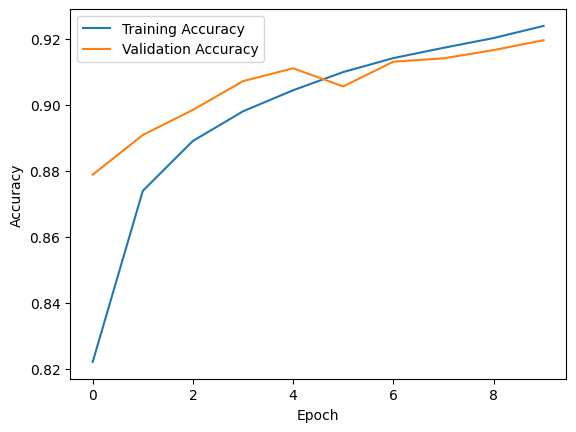

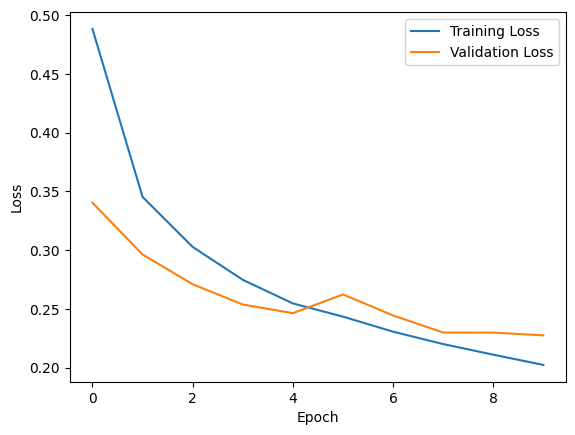

In [13]:
# Виведення графіків точності та втрат від кількості епох
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
# model.load_weights('model.weights.best.hdf5')

In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)

print('\n', 'Test accuracy:', round(score[1], 3))
# Вывод.Точность построенной нейросети выше, чем в предыдущем ДЗ


 Test accuracy: 0.919


313/313 [==============================] - 1s 4ms/step


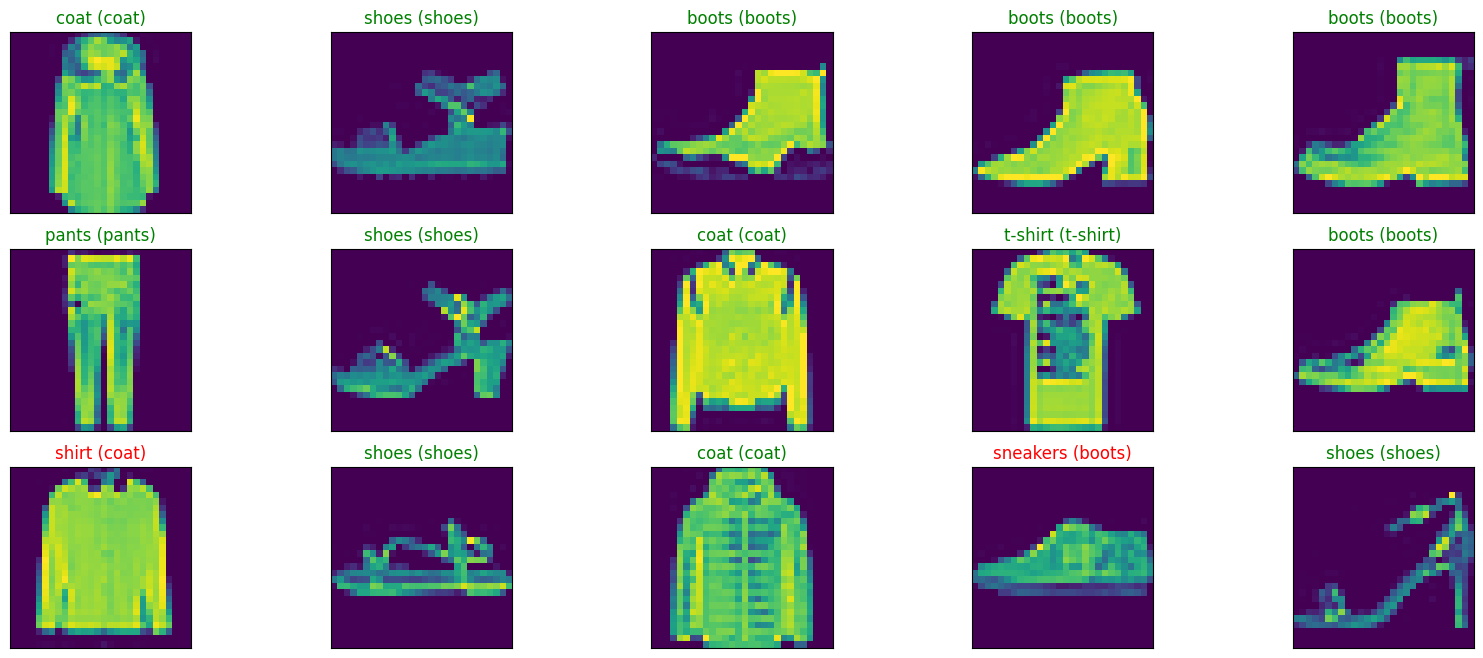

In [19]:
images_hat = model.predict(test_images)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(images_hat[index])
    true_index = np.argmax(test_labels[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))